# SHOWWCASE USER ENGAGEMENT ANALYSIS

# IMPORTS

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')
print("Your Imports are ready!")

Your Imports are ready!


# READ THE DATA

In [173]:
df= pd.read_csv("showwcase_sessions.csv")
print("Done!")

Done!


# VIEW THE DATA

In [174]:
df.head()
# know the dataset head() prints the first 5 columns of our dataset

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


# SHAPE OF THE DATA

In [175]:
df.shape # looking into the rows and columns of our dataset


(302, 14)

# NUMERICAL FEATURES OF DATA

In [176]:
# describe the numerical features:
df.describe()


,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


we discovered that: max session_projects_added were 9, max session_likes_given = 27,max session_comments_given =21
also the mean, mininum and median values of the dataset

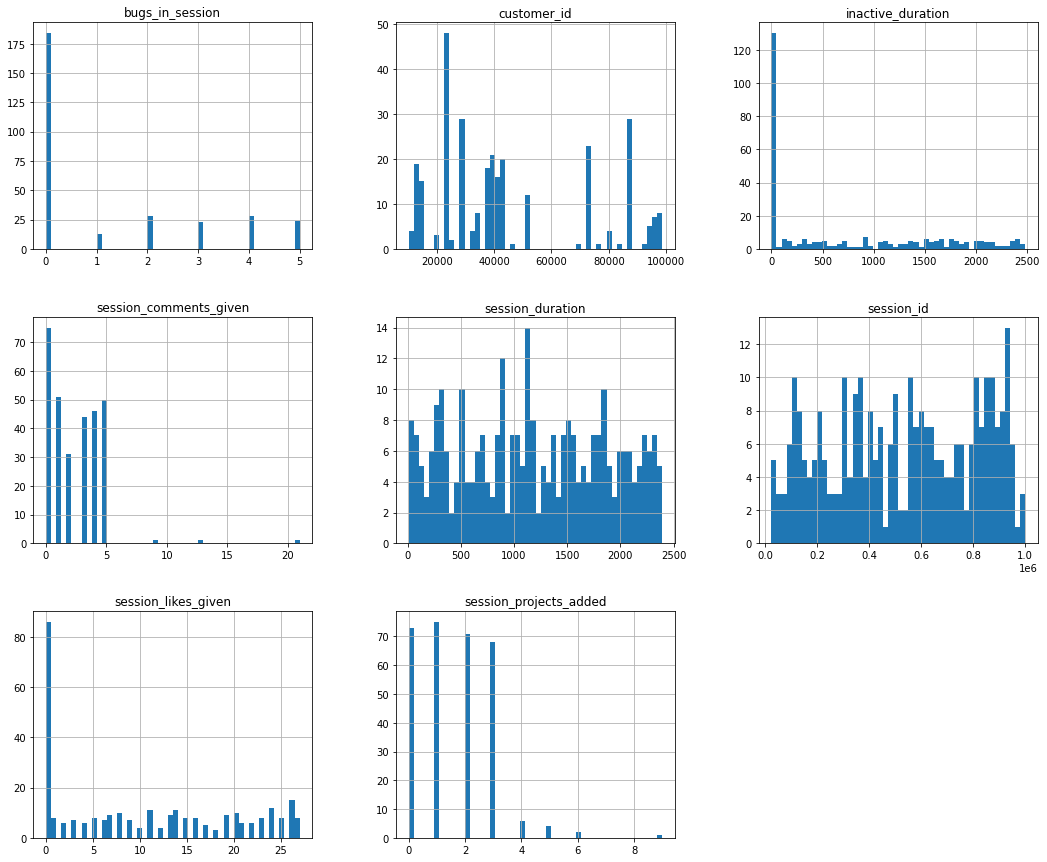

In [177]:
df.hist(bins = 50, figsize= (18, 15))
plt.show()

# CHECK FOR NULL VALUES

In [63]:
# Check for null values:
df.isnull().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

Not many null values, but suspicially samples have null values in the first 14 features, and these might be important features for our model. But 2 samples represents a 
small portion of the total dataset, to the easiest way to fix those missing values is to drop those samples from the dataset rather than finding a way to impute them.

In [144]:

#DROP
da = df.dropna(axis = 0)

In [145]:
da.isnull().sum() ## no remaining null values

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

In [66]:
da.shape
# shape shuld be 2 samples less

(299, 14)

In [146]:
da.info() # gives us the information of dtypes, null amd column names.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              299 non-null    float64
 1   customer_id             299 non-null    float64
 2   login_date              299 non-null    object 
 3   projects_added          299 non-null    object 
 4   likes_given             299 non-null    object 
 5   comment_given           299 non-null    object 
 6   inactive_status         299 non-null    object 
 7   bug_occured             299 non-null    object 
 8   session_projects_added  299 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  299 non-null    float64
 11  inactive_duration       299 non-null    float64
 12  bugs_in_session         299 non-null    float64
 13  session_duration        299 non-null    float64
dtypes: float64(8), object(6)
memory usage: 35.

# Split Login_date

In [148]:
#data transformation:

df['WEEKDAY'] = pd.to_datetime(df['login_date']).dt.dayofweek


In [149]:
df.WEEKDAY.value_counts()

5.0    55
1.0    49
6.0    42
3.0    41
0.0    41
4.0    40
2.0    32
Name: WEEKDAY, dtype: int64

In [150]:
df["WEEKDAY"] = df.WEEKDAY.replace({0.0: "Monday",1.0: "Tuesday", 2.0: "Wednesday", 3.0: "Thursday", 4.0: "Friday", 5.0: "Saturday", 
                                       6.0: "Sunday"})
d=df.WEEKDAY.value_counts()

# Data eXPLORATION AND VISUALIZATION


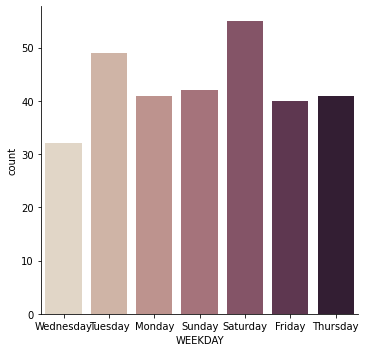

In [151]:
# no of projects with respect to week days.: saturday and tuesday have the highest count
#What special day attracts more new users?
sns.catplot(x="WEEKDAY",kind="count", palette="ch:.25", data=df)

SATURDAY HAD THE HIGHEST COUNT OF 55.
WEEKENDS HAD A COUNT OF 97 PROJECTS OVERALL.

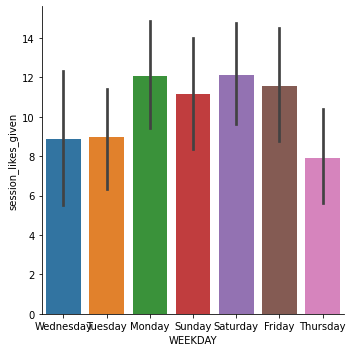

In [44]:
# no of likes given on weekly basis per session: saturday and monday has the highest session likes.

sns.catplot(x="WEEKDAY", y="session_likes_given", kind="bar", data=df)

In [38]:
## this bit might not be the cleanest and I wish I could figure out a better way
## dataframe that counts the entries in each group (visitor type & month)
month_info = da.groupby(['session_projects_added', 'login_date']).count()
month_info.head()

session_id  customer_id  projects_added  \
session_projects_added login_date                                            
0.0                    10/10/19             3            3               3   
                       10/11/19             4            4               4   
                       10/12/19             3            3               3   
                       10/13/19             3            3               3   
                       10/14/19             2            2               2   

                                   likes_given  comment_given  \
session_projects_added login_date                               
0.0                    10/10/19              3              3   
                       10/11/19              4              4   
                       10/12/19              3              3   
                       10/13/19              3              3   
                       10/14/19              2              2   

                                   inactive_status  bug_occured  \
session_projects_added login_date                                 
0.0                    10/10/19                  3            3   
                       10/11/19                  4            4   
                       10/12/19                  3            3   
                       10/13/19                  3            3   
                       10/14/19                  2            2   

                                   session_likes_given  \
session_projects_added login_date                        
0.0                    10/10/19                      3   
                       10/11/19                      4   
                       10/12/19                      3   
                       10/13/19                      3   
                       10/14/19                      2   

                                   session_comments_given  inactive_duration  \
session_projects_added login_date                                              
0.0                    10/10/19                         3                  3   
                       10/11/19                         4                  4   
                       10/12/19                         3                  3   
                       10/13/19                         3                  3   
                       10/14/19                         2                  2   

                                   bugs_in_session  session_duration  WEEKDAY  
session_projects_added login_date                                              
0.0                    10/10/19                  3                 3        3  
                       10/11/19                  4                 4        4  
                       10/12/19                  3                 3        3  
                       10/13/19                  3                 3        3  
                       10/14/19                  2                 2        2

# TIME SERIES PLOT

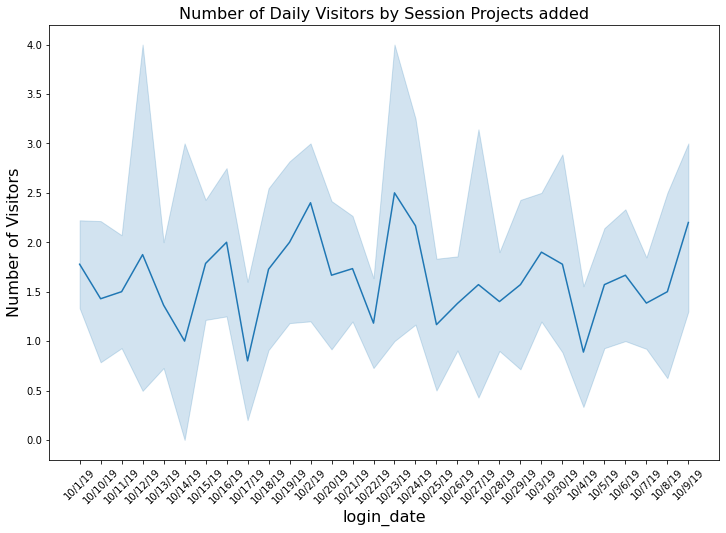

In [17]:
# time series for oct 2019 

plt.figure(figsize=(12, 8))
sns.lineplot(x = 'login_date', y = "session_projects_added", data = da, sizes=(2.5, 2.5))
plt.title("Number of Daily Visitors by Session Projects added", fontsize=16)
plt.xlabel("login_date", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Visitors", fontsize=16)
plt.show()

It shows there are fluctuations are obvious, which proves that users login is not stable. This may be due to the difficulty to attract new users. 

# DISTRIBUTION OF USERS ADDED IN ACTIVE USER

In [181]:
data = df[df['session_duration']>20]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              298 non-null    float64
 1   customer_id             298 non-null    float64
 2   login_date              298 non-null    object 
 3   projects_added          298 non-null    object 
 4   likes_given             298 non-null    object 
 5   comment_given           298 non-null    object 
 6   inactive_status         298 non-null    object 
 7   bug_occured             298 non-null    object 
 8   session_projects_added  298 non-null    float64
 9   session_likes_given     297 non-null    float64
 10  session_comments_given  298 non-null    float64
 11  inactive_duration       298 non-null    float64
 12  bugs_in_session         298 non-null    float64
 13  session_duration        298 non-null    float64
 14  active_status           298 non-null    ob

In [182]:
data['active_index'] = (data['session_duration']-data['inactive_duration'])/data['session_duration']
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active_status,active_index
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,High,0.267263
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,High,0.924689
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,High,0.295516
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,Medium,1.000000
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,High,0.163192


In [185]:

bin = [-100,0,0.2,0.5,0.8,1]
active_status = pd.cut(data['active_index'],bin,labels=['error','inactive','relatively_inactive','relatively_active','active'])
pd.value_counts(active_status)

active                 145
error                   88
relatively_inactive     25
inactive                21
relatively_active       19
Name: active_index, dtype: int64

<AxesSubplot:>

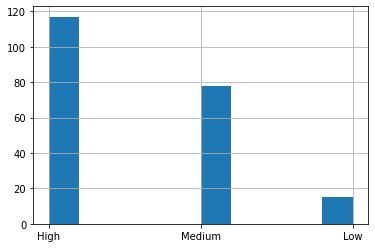

In [187]:
dat = data[data['active_index']>0]
dat['active_status'].hist()


# PROJECTS ADDED, LIKES GIVEN, COMMENTS ADDED

THE amount of users who added projects, given likes and comments.Found participation rate is still relatively high.

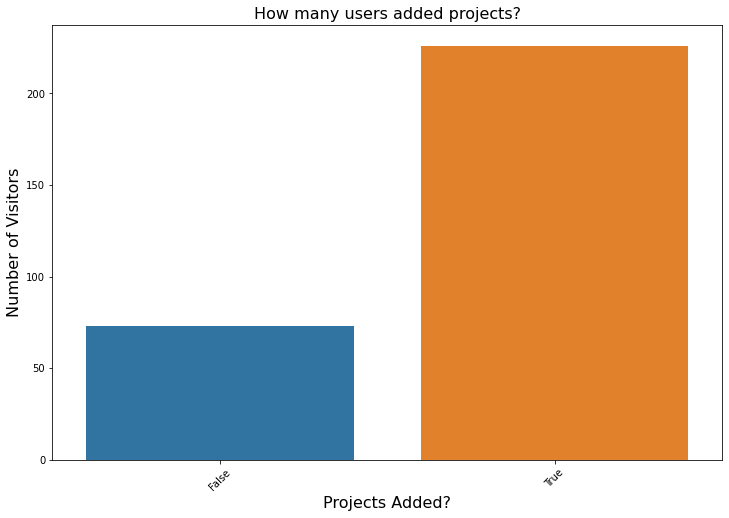

In [18]:
# how many projects were added per session: 220.

plt.figure(figsize=(12, 8))
sns.countplot(x = 'projects_added', data = da)
plt.title("How many users added projects?", fontsize=16)
plt.xlabel("Projects Added?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("count", fontsize=16)
plt.show()

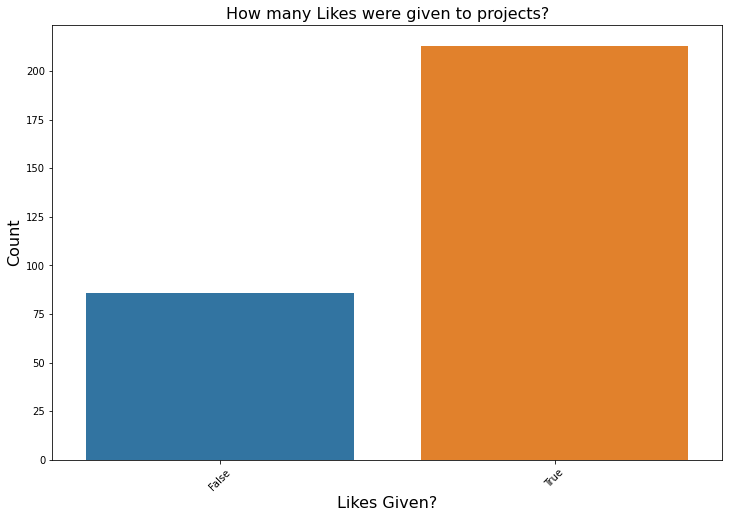

In [157]:
# how many likes were given to projects: around 220

plt.figure(figsize=(12, 8))
sns.countplot(x = 'likes_given', data = da)
plt.title("How many Likes were given to projects?", fontsize=16)
plt.xlabel("Likes Given?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=16)
plt.show()

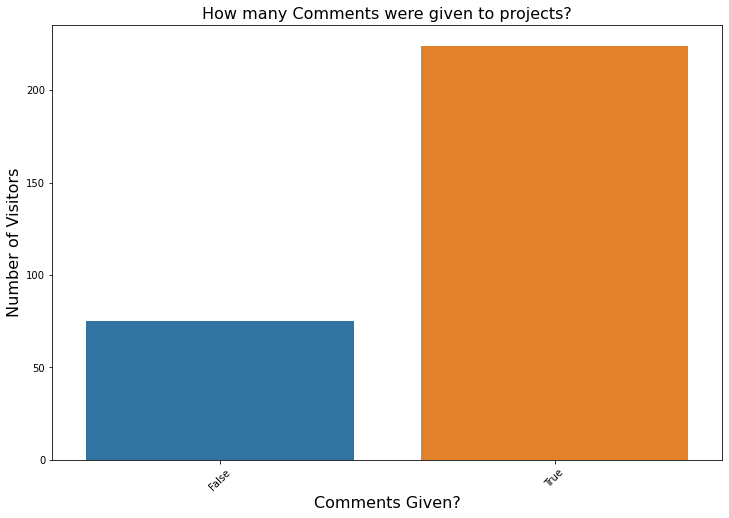

In [22]:
# how many comments given per session : around 220

plt.figure(figsize=(12, 8))
sns.countplot(x = 'comment_given', data = da)
plt.title("How many Comments were given to projects?", fontsize=16)
plt.xlabel("Comments Given?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Visitors", fontsize=16)
plt.show()

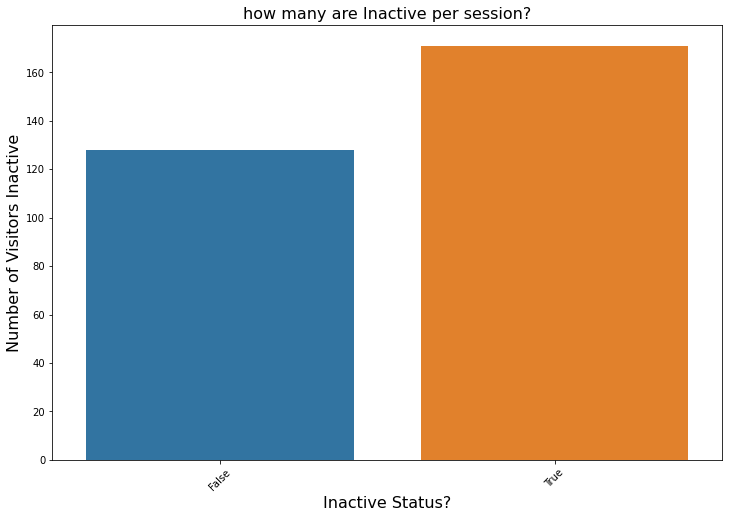

In [158]:
# how many users are inactive during a session : around 170

plt.figure(figsize=(12, 8))
sns.countplot(x = 'inactive_status', data = da)
plt.title("how many are Inactive per session?", fontsize=16)
plt.xlabel("Inactive Status?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of Visitors Inactive", fontsize=16)
plt.show()

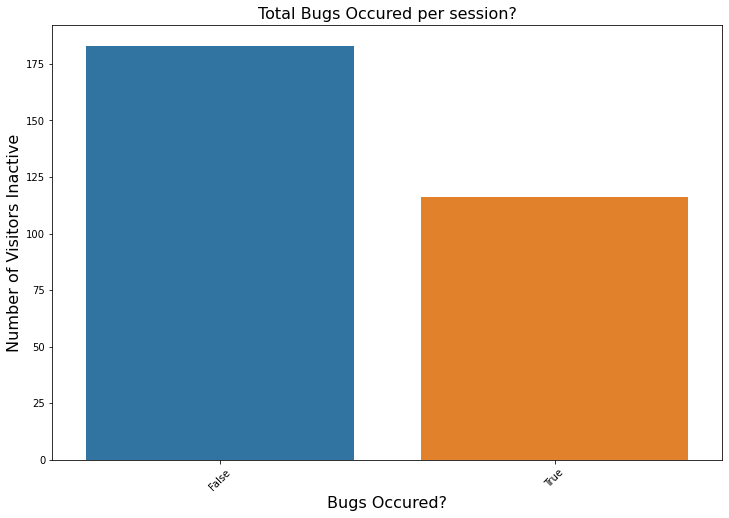

In [129]:
# how many users are Bugs during a session : around 170

plt.figure(figsize=(12, 8))
sns.countplot(x = 'bug_occured', data = da)
plt.title("Total Bugs Occured per session?", fontsize=16)
plt.xlabel("Bugs Occured?", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=16)
plt.show()

# PLOTTING THE DATA FOR BUG OCCURED BY LOGIN DATE.

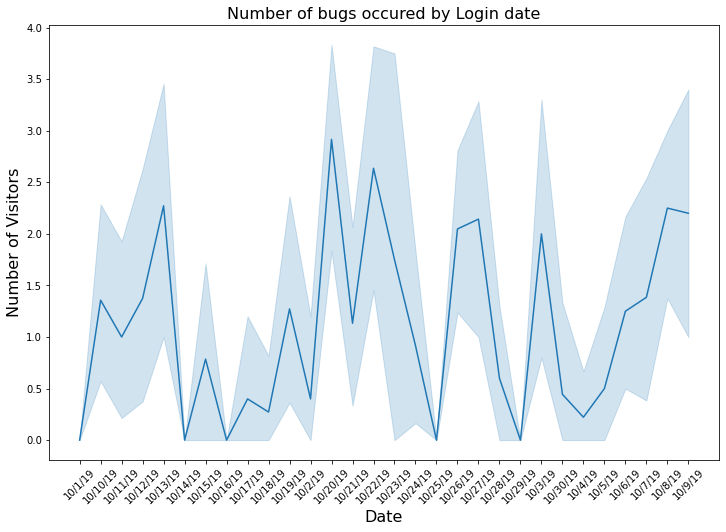

In [28]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = 'login_date', y ="bugs_in_session", data = da, 
         sizes=(2.5, 2.5))
plt.title("Number of bugs occured by Login date", fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("count", fontsize=16)
plt.show()

# BUGS IN SESSION

In [159]:
df['bugs_in_session'].value_counts()

0.0    184
2.0     28
4.0     28
5.0     24
3.0     23
1.0     13
Name: bugs_in_session, dtype: int64

Bugs rate is around 39.06%, which is not so small, it might effect the user experience.

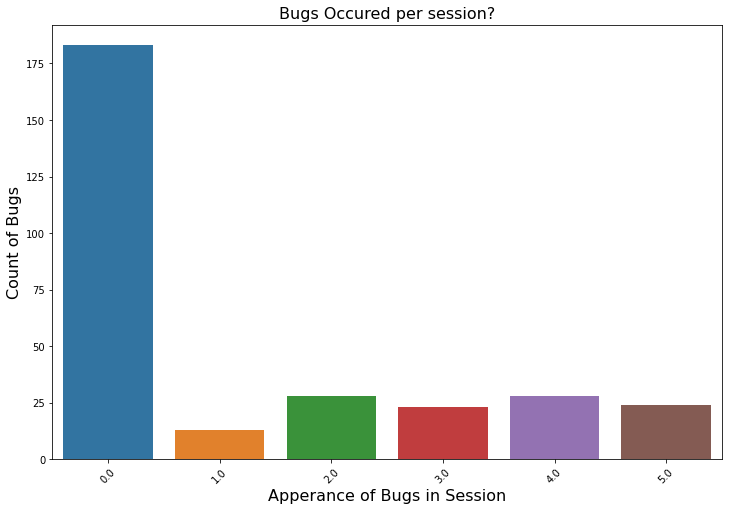

In [161]:
plt.figure(figsize=(12, 8))
sns.countplot(x ='bugs_in_session', data = da)
plt.title("Bugs Occured per session?", fontsize=16)
plt.xlabel("Apperance of Bugs in Session", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Count of Bugs", fontsize=16)
plt.show()

# THANK YOU